In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
tse_df = pd.read_csv(
    'C:\\Users\\ADMIN\AppData\Roaming\MetaQuotes\Terminal\\2506E8E7E4116548D478CE2C3598FAB1\MQL5\Files\shakhS kl6-D1.prn')
tse_df

,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20081205,0,9249.00,9249.00,9249.00,9249.00,37
1,20081206,0,9249.00,9249.00,9168.00,9168.00,37
2,20081207,0,9178.00,9178.00,9130.00,9130.00,37
3,20081208,0,9130.00,9130.00,9080.00,9080.00,37
4,20081210,0,9089.00,9089.00,9032.00,9032.00,37
...,...,...,...,...,...,...,...
3379,20221231,0,1647314.50,1647314.50,1590945.00,1590945.00,22
3380,20230101,0,1590495.50,1591836.25,1564080.63,1564374.88,21
3381,20230102,0,1564365.63,1593354.63,1564365.63,1593275.38,49
3382,20230103,0,1593285.00,1602708.38,1591374.00,1591374.00,49


In [39]:
tse_df.drop(['<DTYYYYMMDD>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<VOL>'], axis=1, inplace=True)
tse_df.rename(columns={'<CLOSE>': 'close'}, inplace=True)
tse_df

,close
0,9249.00
1,9168.00
2,9130.00
3,9080.00
4,9032.00
...,...
3379,1590945.00
3380,1564374.88
3381,1593275.38
3382,1591374.00


In [40]:
close_rate_1d = [1]
for i in tse_df.index[1:]:
    close_rate_1d.append(tse_df.close[i] / tse_df.close[i - 1])

In [41]:
close_rate_1d = pd.Series(np.array(close_rate_1d))
close_rate_1d

0       1.000000
1       0.991242
2       0.995855
3       0.994524
4       0.994714
          ...   
3379    0.966009
3380    0.983299
3381    1.018474
3382    0.998807
3383    0.992323
Length: 3384, dtype: float64

In [42]:
tse_df = pd.concat([tse_df, close_rate_1d], axis=1)
tse_df.rename(columns={0: 'retun_1d'}, inplace=True)
tse_df

,close,retun_1d
0,9249.00,1.000000
1,9168.00,0.991242
2,9130.00,0.995855
3,9080.00,0.994524
4,9032.00,0.994714
...,...,...
3379,1590945.00,0.966009
3380,1564374.88,0.983299
3381,1593275.38,1.018474
3382,1591374.00,0.998807


In [43]:
mean_linear_return = tse_df.retun_1d.mean()
mean_linear_return

1.0015755169214664

In [44]:
def mean_exp(data):
    p = 1
    n = 0
    for i in data:
        if i != 0:
            p*=i
            n+=1
    return p**(1/n)

In [45]:
mean_exp(tse_df.retun_1d)

1.0015201055504759

In [46]:
mean_exp_return=mean_exp(tse_df.retun_1d)

In [47]:
expected_index=[]
for i in tse_df.index:
    expected_index.append(tse_df.close[0]*(mean_exp_return**i))
expected_index

[9249.0,
 9263.059456236351,
 9277.140284330166,
 9291.24251676892,
 9305.366186089475,
 9319.511324878162,
 9333.677965770832,
 9347.866141452952,
 9362.075884659682,
 9376.30722817593,
 9390.560204836447,
 9404.834847525897,
 9419.13118917893,
 9433.449262780263,
 9447.789101364746,
 9462.150738017455,
 9476.534205873755,
 9490.939538119379,
 9505.366767990505,
 9519.815928773836,
 9534.287053806675,
 9548.780176476996,
 9563.295330223535,
 9577.832548535847,
 9592.391864954405,
 9606.97331307066,
 9621.576926527132,
 9636.202739017477,
 9650.85078428657,
 9665.521096130577,
 9680.213708397048,
 9694.928654984975,
 9709.665969844884,
 9724.425686978911,
 9739.20784044088,
 9754.012464336372,
 9768.83959282282,
 9783.689260109579,
 9798.561500458005,
 9813.456348181528,
 9828.373837645751,
 9843.31400326851,
 9858.276879519955,
 9873.262500922641,
 9888.2709020516,
 9903.302117534417,
 9918.35618205132,
 9933.433130335254,
 9948.532997171957,
 9963.655817400051,
 9978.801625911112,
 9

In [48]:
expected_index=pd.Series(np.array(expected_index))
expected_index

0       9.249000e+03
1       9.263059e+03
2       9.277140e+03
3       9.291243e+03
4       9.305366e+03
            ...     
3379    1.567210e+06
3380    1.569592e+06
3381    1.571978e+06
3382    1.574368e+06
3383    1.576761e+06
Length: 3384, dtype: float64

In [49]:
tse_df=pd.concat([tse_df,expected_index],axis=1)
tse_df

,close,retun_1d,0
0,9249.00,1.000000,9.249000e+03
1,9168.00,0.991242,9.263059e+03
2,9130.00,0.995855,9.277140e+03
3,9080.00,0.994524,9.291243e+03
4,9032.00,0.994714,9.305366e+03
...,...,...,...
3379,1590945.00,0.966009,1.567210e+06
3380,1564374.88,0.983299,1.569592e+06
3381,1593275.38,1.018474,1.571978e+06
3382,1591374.00,0.998807,1.574368e+06


In [50]:
tse_df.rename(columns={0:'expected_index'},inplace=True)
tse_df

,close,retun_1d,expected_index
0,9249.00,1.000000,9.249000e+03
1,9168.00,0.991242,9.263059e+03
2,9130.00,0.995855,9.277140e+03
3,9080.00,0.994524,9.291243e+03
4,9032.00,0.994714,9.305366e+03
...,...,...,...
3379,1590945.00,0.966009,1.567210e+06
3380,1564374.88,0.983299,1.569592e+06
3381,1593275.38,1.018474,1.571978e+06
3382,1591374.00,0.998807,1.574368e+06


In [51]:
tse_df['real_per_expected']=tse_df['close']/tse_df['expected_index']
tse_df

,close,retun_1d,expected_index,real_per_expected
0,9249.00,1.000000,9.249000e+03,1.000000
1,9168.00,0.991242,9.263059e+03,0.989738
2,9130.00,0.995855,9.277140e+03,0.984139
3,9080.00,0.994524,9.291243e+03,0.977264
4,9032.00,0.994714,9.305366e+03,0.970623
...,...,...,...,...
3379,1590945.00,0.966009,1.567210e+06,1.015145
3380,1564374.88,0.983299,1.569592e+06,0.996676
3381,1593275.38,1.018474,1.571978e+06,1.013548
3382,1591374.00,0.998807,1.574368e+06,1.010802


In [52]:
tse_df.to_csv('F:\my project\dataset\\tse\\expected.csv')

In [54]:
m_p=tse_df.real_per_expected.mean()
m_p

0.8998922506073905

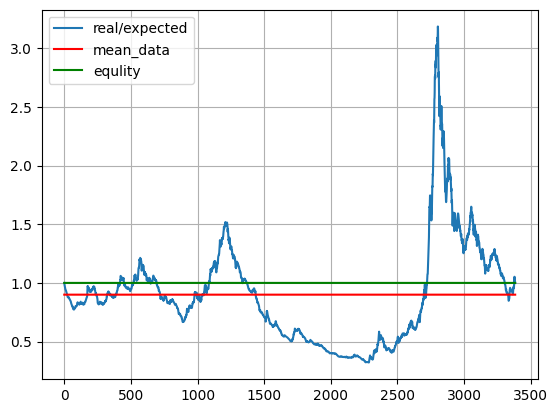

In [58]:
plt.plot(tse_df.real_per_expected)
plt.plot([m_p]*len(tse_df.index),c='red')
plt.plot([1]*len(tse_df.index),c='green')
plt.legend(['real/expected','mean_data','equlity'])
plt.grid()